# Linear Regression from Scratch only using numpy

In [26]:
import numpy as np
import time
import matplotlib.pyplot as plt

### Data prep

In [27]:
start = 0
end = 1
step = 0.02


### true params
weight = 0.7
bias = 0.3

X = np.arange(start, end, step)
X = np.expand_dims(X, axis = 1)
y = weight * X + bias

In [28]:
print(f"Size of X : {np.size(X)}")
print(f"Shape of X : {np.shape(X)}")

Size of X : 50
Shape of X : (50, 1)


In [29]:
X[:10], y[:10]

(array([[0.  ],
        [0.02],
        [0.04],
        [0.06],
        [0.08],
        [0.1 ],
        [0.12],
        [0.14],
        [0.16],
        [0.18]]),
 array([[0.3  ],
        [0.314],
        [0.328],
        [0.342],
        [0.356],
        [0.37 ],
        [0.384],
        [0.398],
        [0.412],
        [0.426]]))

### train test split



In [30]:
train_split = int(0.8*len(X))
X_train , y_train = X[:train_split],y[:train_split]
X_test , y_test = X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)


(40, 40, 10, 10)

### Visualising the data

In [ ]:
import matplotlib.pyplot as plt

def plot_predictions(train_data, train_labels, test_data, test_labels, predictions=None):
    plt.figure(figsize=(10,7))

    # Train data
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Test data
    plt.scatter(test_data, test_labels, c="g", s=4, label="Test data")

    # Predictions
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    plt.legend(prop={"size":14})
    plt.show()


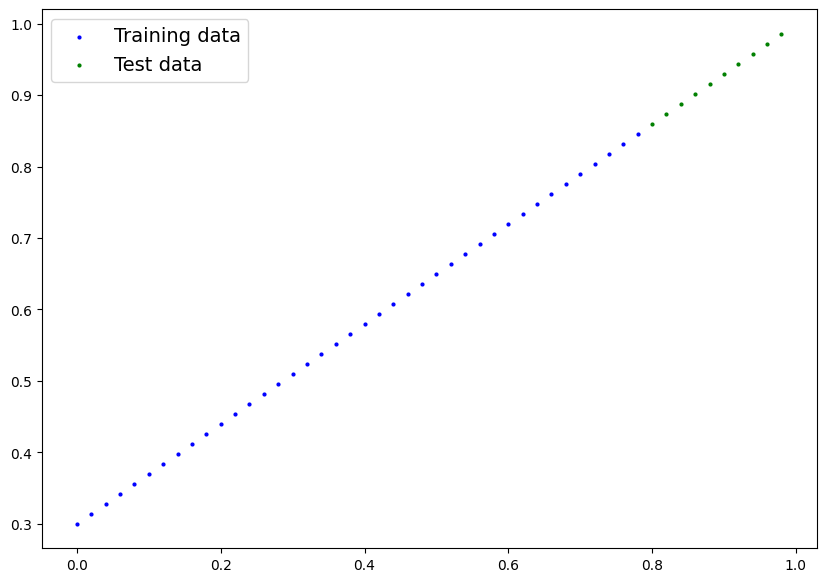

In [32]:
plot_predictions(X_train, y_train, X_test, y_test, predictions=None)


### Building a model

In [33]:
from typing import Any

class LinearRegression:
    def __init__(self):

        ### randomly initialize weights and bias
        self.weights = np.random.randn(1).astype(float)
        self.bias = np.random.randn(1).astype(float)

    def forward(self,x: np.ndarray) -> np.ndarray:
        return self.weights * x + self.bias #(linear regression)

    def __call__(self, x:np.ndarray) -> np.ndarray:
        return self.forward(x)
    
    def parameters(self):
        return [self.weights,self.bias]

    def step(self, X, y, lr = 0.01):
        y_pred = self.forward(X)

        #Gradients
        N = len(X)

        dw = (-2/N) * np.sum(X * (y - y_pred))
        db = (-2/N) * np.sum(y - y_pred)

        #update
        self.weights = self.weights - lr * dw
        self.bias = self.bias - lr *db

        #return loss to track
        loss = np.mean((y-y_pred)**2)
        return loss

In [34]:
model_0 = LinearRegression()
print(model_0.parameters())

[array([1.2336385]), array([-0.35202334])]


In [35]:
y_preds = model_0(X_test)
y_preds

array([[0.63488746],
       [0.65956023],
       [0.684233  ],
       [0.70890577],
       [0.73357854],
       [0.75825131],
       [0.78292408],
       [0.80759685],
       [0.83226962],
       [0.85694239]])

### Now comes the MATH

## loss function : MSE (Mean Squared Error)

In [36]:
def loss_fn(y_true,y_pred):
    errors = y_true-y_pred
    square_errors = errors ** 2
    loss = np.mean(square_errors)
    return loss

### Optimizer

In [46]:
epochs  = 1000
for epoch in range(epochs):
    loss = model_0.step(X_train, y_train, lr = 0.01)

    if epoch % 5 == 0:
        print(f"EPoch {epoch} | loss : {loss:.4f} | weight: {model_0.weights} | bias : {model_0.bias}")

EPoch 0 | loss : 0.0000 | weight: [0.70109472] | bias : [0.29955249]
EPoch 5 | loss : 0.0000 | weight: [0.7010897] | bias : [0.29955454]
EPoch 10 | loss : 0.0000 | weight: [0.7010847] | bias : [0.29955658]
EPoch 15 | loss : 0.0000 | weight: [0.70107972] | bias : [0.29955862]
EPoch 20 | loss : 0.0000 | weight: [0.70107477] | bias : [0.29956064]
EPoch 25 | loss : 0.0000 | weight: [0.70106983] | bias : [0.29956266]
EPoch 30 | loss : 0.0000 | weight: [0.70106492] | bias : [0.29956467]
EPoch 35 | loss : 0.0000 | weight: [0.70106004] | bias : [0.29956666]
EPoch 40 | loss : 0.0000 | weight: [0.70105517] | bias : [0.29956865]
EPoch 45 | loss : 0.0000 | weight: [0.70105033] | bias : [0.29957063]
EPoch 50 | loss : 0.0000 | weight: [0.70104551] | bias : [0.2995726]
EPoch 55 | loss : 0.0000 | weight: [0.70104072] | bias : [0.29957456]
EPoch 60 | loss : 0.0000 | weight: [0.70103594] | bias : [0.29957652]
EPoch 65 | loss : 0.0000 | weight: [0.70103119] | bias : [0.29957846]
EPoch 70 | loss : 0.0000 

In [56]:
y_preds = model_0(X_test)

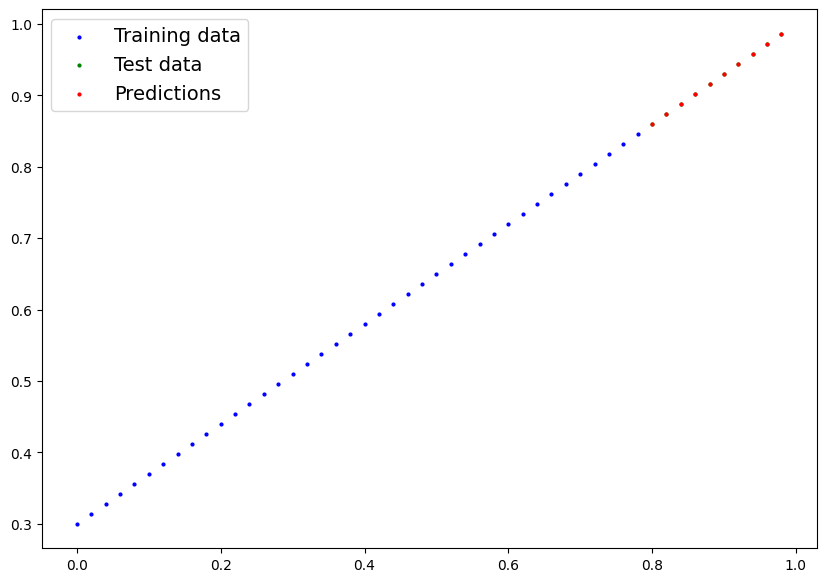

In [57]:
plot_predictions(X_train, y_train, X_test, y_test, predictions=y_preds)
